En esta práctica vamos a ver los puntos básicos para desarrollar tareas de clustering en Python, usando los métodos que estudiamos durante la semana: clustering jerárquico aglomerativo y k-means. 

Para poder desarrollar los ejercicios es necesario tener las bibliotecas: numpy, sklearn y matplotlib. 

# 1. Clustering jerárquico

Empecemos con un ejemplo muy pequeño para ir viendo cómo funciona el algoritmo de Python.  Considera la siguiente colección de 5 puntos en $R^2$, que se han etiquetado del 0 al 4. 

![fig_toyExample0.png](attachment:fig_toyExample0.png)

Imagínate que decidimos agrupar los puntos usando clustering jerárquico aglomerativo con distancia euclideana y _single link_. Como al inicio cada punto es su propio cluster, tenemos clusters del 0 al 4. Al nuevo grupo lo llamamos 5. 
![fig_toyExample1.png](attachment:fig_toyExample1.png)

Al final tenemos 8 grupos. El grupo 8 es el que contiene a todos los puntos. 
![fig_toyExample4.png](attachment:fig_toyExample4.png)

Ahora vamos a desarrollar este ejemplo en Python. Empezamos importando bibliotecas y declarando los puntos del mismísimo ejemplo. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch 
import pandas as pd

x = [-2,-2,0,2,3.5]
y = [-1.5,-1,-1,1,1]

El comando que usamos para agrupar los puntos  es **linkage**. La entrada es una matriz $n\times m$ que contiene $n$ puntos en $R^m$. En este caso, necesitamos concatenar nuestros vectores para que estén en el formato correcto. 

In [ ]:
A = np.column_stack((x,y)) #Estos comandos para concatenar bloques
                           #son super útiles (hstack,vstack).Sépanlos!
print(A) 

[[-2.  -1.5]
 [-2.  -1. ]
 [ 0.  -1. ]
 [ 2.   1. ]
 [ 3.5  1. ]]


In [ ]:
H = sch.linkage(A, method='single', metric='euclidean')
H.shape

(4, 4)

Primero, nota los parámetros de entrada. El comando tiene también las opciones para método: "average", "complete", "centroid" y "ward", entre otras. En cuanto a *metric* es posible usar otras opciones predefinidas o, incluso, usar una función definida por el usuario; esto le va a dar mucha flexibilidad al algoritmo. Finalmente, observemos que la salida del algoritmo es una matriz 4 x 4; vamos a ver qué entradas tiene. 

In [ ]:
print(H)

[[0.         1.         0.5        2.        ]
 [3.         4.         1.5        2.        ]
 [2.         5.         2.         3.        ]
 [6.         7.         2.82842712 5.        ]]


La salida de **linkage** para $n$ instancias siempre es una matriz de tamaño $(n-1)\times 4$.

**Columnas 0 y 1:** indican cuál clúster se combinó con cuál. Nota que, tal como vimos en la figura, al principio los clústers corresponden a puntos, pero en la tercera fila vemos que se combinaron los clústers 2 y 5 a pesar de que no hay un punto 5 en los datos de entrada. La nomenclatura que utiliza esta implementación sigue la misma idea que nuestro dibujo: el cluster que se forma en la iteración $i$ recibe el identificador $n + i$. Así, vemos en esta matriz que el cluster 5 es el que se forma en la primera iteración al combinar los puntos 0 y 1 (o sea, el cluster 5 de nuestro dibujo). 

**Columna 2:** Indica la distancia que había en entre los clústers combinados. 

**Columna 3:** Indica cuántos puntos hay en este momento en el clúster recién formado.


Ahora sólo falta graficar esta información usando el comando **dendrogram**.


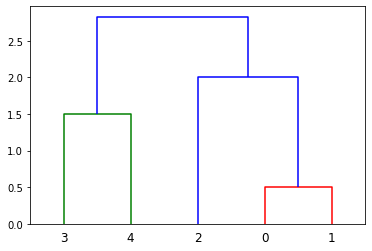

In [ ]:
sch.dendrogram(H)
plt.show()

En este caso la figura es muy clara porque sólo tenemos 5 puntos. Revisa la documentación en el sitio de scipy para explorar las opciones que tiene esta función. Las opciones incluyen: truncar el dendrograma a determinado nivel, orientarlo horizontalmente y modificar el color. 

Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html?highlight=dendrogram#scipy.cluster.hierarchy.dendrogram

### Ejercicio 1:
<div class="alert-info">
Redibuja el dendrograma anterior para esos mismos datos pero ahora usando el método "complete link" y "average link".

</div>


In [ ]:
# Declaramos nuestros puntos primero
x = [-2,-2,0,2,3.5]
y = [-1.5,-1,-1,1,1]
# Los unimos para formar lo que serian las coordenadas
B = np.column_stack((x,y))

print(B)

[[-2.  -1.5]
 [-2.  -1. ]
 [ 0.  -1. ]
 [ 2.   1. ]
 [ 3.5  1. ]]


In [ ]:
I = sch.linkage(B, method='complete', metric='euclidean') # Efectuamos el clustering con "complete link"
I.shape

(4, 4)

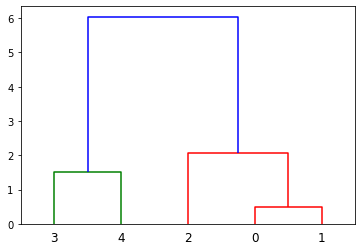

In [ ]:
# ANTES DE VER EL RESULTADO Y DE SEGUIR CON EL EJERCICIO LO VOY A HACER A MANO PARA  PRÁCTICAR EL ALGORITMO
sch.dendrogram(I)
plt.show()

In [ ]:
I = sch.linkage(B, method='average', metric='euclidean') # Efectuamos el clustering con "average link"
I.shape

(4, 4)

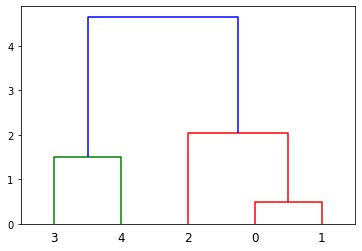

In [ ]:

sch.dendrogram(I)
plt.show()

# K-means

El uso de K-means en Python es más o menos directo. Vamos a suponer que quiero encontrar 2 grupos en el ejemplo de juguete que usamos en la sección anterior y que en este punto del laboratorio están en la matriz $A$.

In [ ]:
import sklearn.cluster as skc

resultado = skc.KMeans(n_clusters=2,init='random',max_iter=200).fit(A)
resultado

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=200, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

KMeans tiene algunos otros parámetros de entrada que puedes consultar en la documentación. Algo **importante** cuando uses este método de sklearn es que te cerciores de que cada FILA representa una instancia, y cada columna un atributo. O sea, se espera que la matriz $A$ siempre sea de tamaño *(númeroDePuntos x númeroDeAtributos)*.

Lo que queda guardado en *resultado* son cuatro cosas:
- **cluster_centers_** que son los centroides de tu agrupamiento.
- **labels_** que es un arreglo de $n\times 1$ indicando a qué grupo pertenece cada punto en tus datos
- **inertia_** que nos dice el valor que se alcanzó en la función objetivo
- **n_iter_** que nos dice cuántas iteraciones necesitó el algoritmo para converger (o detenerse)

In [ ]:
resultado.labels_, resultado.n_iter_

(array([0, 0, 0, 1, 1], dtype=int32), 2)

# Caso de estudio: segmentación de mercado para VW
Te acaba de contratar Volkswagen, quien te muestra el perfil de los últimos 250 clientes para cierto modelo. La información se encuentra en el archivo *clientesVW_perfilGeneral.zip*, que a su vez contiene *clientesVW_perfilGeneral.csv* y *clientesVW_atributos.txt*. 

Tu misión es sugerirle una segmentación de mercado, es decir, analizar los datos e identificar posibles perfiles de clientes que tienen determinado patrón. 

No sabes bien por dónde empezar y en la clase de minería de datos ni tan siquiera has llevado análisis exploratorio de datos. ¡¿Qué hacer?!

Tip: Puedes leer directamente los datos del formato *csv* a una matriz de numpy usando 
*A = np.genfromtxt('clientesWV_perfilGeneral.csv',delimiter=',')*

2. Primero, haz un dendrograma con tus datos. Muestra la figura.

3. ¡Oh no! Son 250 clientes y tu dendrograma es confuso. Usa la opción *truncate_mode='level'*  (revisa la documentación! te va a faltar especificar un parámetro) para mostrar diez niveles de tu dendrograma. Muestra la figura. ¿O quizá las figuras? Ve describiendo tu razonamiento y documentando las decisiones que tomes. 

4. A partir de la figura, ¿cuántos grupos vas a sugerir que hay? ¿por qué? No hay una respuesta correcta pero explica la lógica que sigues para tu propuesta. 

5. Utilizando el $k$ que decidiste en el punto anterior, encuentra los $k$ grupos de clientes usando k-means. Utiliza los resultados para:

    5a. Dar una descripción del perfil de cliente en cada grupo (justifica tu respuesta).

    5b. Indicar en cuál de esos grupos debe enfocarse la compañía para darle prioridad (justifica tu respuesta).

## Bonus:

Si terminaste tu ejercicio y quieres puntos extra, programa kMeans para el caso bidimensional, de manera que pueda **verse** cada paso del proceso (cada grupo de un color, los centroides modificándose). La salida de tu código debe ser, además de la predicción para cada instancia, un gif que muestre el proceso. 

Tu código no tiene necesariamente tiene que ser eficiente, pero sí tiene que ser tuyo. 









In [ ]:
VW_Clients = np.genfromtxt('/content/clientesVW_perfilGeneral.csv',delimiter=','); VW_Clients

array([[2., 3., 2., 5., 0., 6.],
       [1., 2., 1., 1., 1., 3.],
       [2., 3., 2., 3., 1., 1.],
       ...,
       [1., 2., 2., 3., 0., 4.],
       [2., 3., 2., 3., 0., 6.],
       [2., 1., 1., 5., 0., 2.]])

In [ ]:
VW_Cluster = sch.linkage(VW_Clients, method='average', metric='euclidean') # Efectuamos el clustering con "single link"
VW_Cluster.shape
#print("\n",VW_Cluster[-60:])

(249, 4)

#2.Primero, haz un dendrograma con tus datos. Muestra la figura.

He decidido usar como método "average link" ya que busco similitud entre los clientes, por lo tanto busco similitudes entre sus 
atributos y de esta manera poder agruparlos por un margen de parentezco. Average toma todos los atributos y los promedia por lo tanto de esta manera garantizo que se contemplan todos los atributos para agrupar X cliente con Y cliente. 

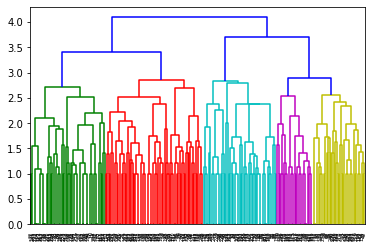

In [ ]:
sch.dendrogram(VW_Cluster)
plt.show()

#3.¡Oh no! Son 250 clientes y tu dendrograma es confuso. Usa la opción truncate_mode='level' (revisa la documentación! te va a faltar especificar un parámetro) para mostrar diez niveles de tu dendrograma. Muestra la figura. ¿O quizá las figuras? Ve describiendo tu razonamiento y documentando las decisiones que tomes. 

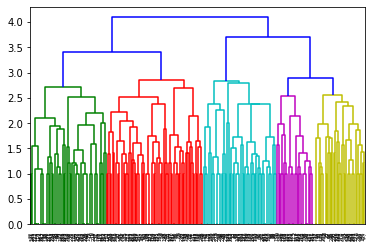

In [ ]:
sch.dendrogram(VW_Cluster, truncate_mode="level", p=10)
plt.show()

#4.A partir de la figura, ¿cuántos grupos vas a sugerir que hay? ¿por qué? No hay una respuesta correcta pero explica la lógica que sigues para tu propuesta. 

In [ ]:
VW_Cluster[:,3], (len(VW_Cluster[:,3])) 
# Todos los puntos que hay en el cluster conforme se va formando el cluster que encierra a todos los clusters

(array([  2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   3.,   4.,   2.,   2.,   2.,   3.,   2.,   2.,   2.,
          2.,   2.,   3.,   2.,   2.,   3.,   2.,   2.,   3.,   2.,   3.,
          2.,   2.,   3.,   2.,   2.,   2.,   3.,   2.,   2.,   2.,   2.,
          2.,   2.,   3.,   3.,   2.,   2.,   3.,   4.,   2.,   2.,   5.,
          2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   3.,   2.,   2.,
          4.,   3.,   2.,   2.,   2.,   2.,   3.,   2.,   2.,   4.,   2.,
          2.,   2.,   5.,   2.,   3.,   6.,   2.,   2.,   4.,   3.,   3.,
          4.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   4.,   3.,   3.,
          4.,   3.,   4.,   4.,   3.,   2.,   3.,   2.,   3.,   3.,   2.,
          2.,   5.,   2.,   2.,   2.,   2.,   4.,   3.,   2.,  10.,   5.,
          4.,   4.,   4.,   4.,   4.,   4.,   4.,   5.,   6.,   3.,   4.,
          5.,   4.,   4.,   3.,   3.,   5.,   6.,   3.,   4.,   3.,   3.,
          4.,   3.,   3.,   3.,   3., 

In [ ]:
unique_VW_Cluster = list(set(VW_Cluster[:,3]))
len(unique_VW_Cluster)#, unique_VW_Cluster

34

Tengo dos respuestas para esta pregunta, las explicaré ambas y al final por qué tomo una en lugar de otra. 

1. Razonamiento número 1:
A partir de ver el dendograma resultante y los diferentes colores asignados para identificar grupos similares, "contando" podemos observar que hay cinco grupos (5 colores). Así mismo recordemos que estamos trabajando únicamente con 250 registros y por el tipo de problema que estamos resolviendo (venta de autos) podemos dar por hecho que no tendremos demasiados grupos dado que no todos pueden costearse un auto nuevo así mismo, es necesario mencionar que estamos trabajando con seis atributos que nos describen cada registro de una manera no muy detallada. Por lo que 5 grupos suena bastante razonable. 

2. Razonamiento número 2: 
Recordemos que en la matriz obtenida con linkage, la columna número 3 indica 
cuantos puntos hay en ese momento en el cluster formado, recordemos que los puntos comienzan siendo sus propios clusters y se van emparejando con su más cercano, formando al final de la iteración un único cluster compuesto de sub clusters. Por lo que si tomamos la 3ra columna, y aplicamos "set" para eliminar duplicados, obtenemos el tamaño de cada uno de los sub clusters que hay dentro del cluster final que engloba a todos. Por lo que si convertimos este "set" a "list" podemos aplicar "len" y obtener la longitud que lo que nos diría es una aproximación de todos los grupos que conforman nuestro cluster final, y digo aproximación porque al aplicar set para eliminar duplicados perdímos algunos subcobjuntos. 

**Elección de razonamiento**
En el razonamiento dos estamos contemplando los subconjuntos más pequeños, es decir, esos subconjuntos compuestos por dos clientes pero recordemos que lo que queremos es segmentar a nuestros clientes, es decir agruparlos por caracteristicas similares por lo que he de escoger que hay 5 grupos y en estos cinco grupos que son los representativos encontramos ya esos subgrupos de dos personas agrupados en su respectivo grupo con caracteristicas más afines. 

**R.** 5 grupos 


#5.Utilizando el k que decidiste en el punto anterior, encuentra los k grupos de clientes usando k-means. Utiliza los resultados para:

5a. Dar una descripción del perfil de cliente en cada grupo (justifica tu respuesta).

5b. Indicar en cuál de esos grupos debe enfocarse la compañía para darle prioridad (justifica tu respuesta).


In [ ]:
clients = pd.read_csv('/content/clientesVW_perfilGeneral.csv')
clients.columns = ["Sexo", "Estado_civil", "¿primera_vez_que_compra_auto?", "Edad","Hijos" ,"Salario"]
#I. Sexo: 1. Hombre 2. Mujer
#II. Estado civil: 1. Casado 2. Unión libre 3. Soltero
#III. ¿Primera vez que compra un auto? 1. Si 2. No
#IV. Edad por categorías: 1. <25 2. 25-29 3. 30-34 4. 35-39 5. 40-44 6  >44
#V. Categorías relativas a hijos 0. 0 1. 1 2. Más de 1
#VI. Categorías relativas al salario (percepción mensual en miles de pesos) 1. < 10 2. 10-15 3. 15-20 4. 20-25 5. 25-30 6. > 30
clients.head(5)


,Sexo,Estado_civil,¿primera_vez_que_compra_auto?,Edad,Hijos,Salario
0,1,2,1,1,1,3
1,2,3,2,3,1,1
2,1,3,2,5,0,3
3,2,1,1,5,2,4
4,2,1,1,2,1,4


In [ ]:
resultado = skc.KMeans(n_clusters=5,init='random',max_iter=600).fit(clients)
resultado, resultado.labels_

(KMeans(algorithm='auto', copy_x=True, init='random', max_iter=600, n_clusters=5,
        n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
        tol=0.0001, verbose=0),
 array([1, 1, 3, 2, 0, 0, 4, 1, 0, 3, 4, 3, 0, 3, 2, 1, 1, 2, 0, 2, 2, 2,
        1, 3, 3, 4, 3, 0, 2, 3, 4, 4, 1, 1, 1, 4, 1, 0, 0, 4, 0, 0, 1, 4,
        3, 1, 3, 2, 0, 0, 3, 3, 0, 2, 1, 0, 3, 3, 0, 0, 4, 4, 4, 2, 3, 3,
        4, 0, 1, 1, 3, 4, 3, 0, 0, 4, 2, 0, 1, 3, 1, 2, 0, 3, 2, 0, 0, 1,
        1, 0, 1, 2, 1, 2, 0, 0, 3, 3, 2, 3, 0, 3, 3, 0, 1, 4, 3, 1, 1, 3,
        4, 4, 4, 3, 1, 1, 2, 3, 0, 3, 4, 2, 0, 1, 1, 1, 4, 0, 3, 0, 2, 4,
        1, 2, 0, 1, 1, 3, 3, 2, 1, 4, 2, 3, 3, 2, 3, 4, 1, 4, 1, 2, 0, 1,
        3, 0, 4, 3, 3, 2, 3, 1, 0, 1, 3, 3, 3, 0, 4, 1, 2, 1, 2, 1, 0, 0,
        0, 3, 0, 3, 1, 2, 0, 2, 2, 1, 1, 0, 4, 3, 1, 1, 2, 0, 3, 1, 0, 3,
        0, 4, 4, 0, 0, 4, 0, 3, 3, 3, 2, 1, 1, 3, 2, 4, 1, 2, 2, 0, 4, 2,
        2, 2, 0, 2, 4, 4, 0, 2, 0, 1, 3, 0, 4, 1, 3, 1, 3, 1, 0, 1

In [ ]:
cluster_result = list(resultado.labels_)
#len(aux) >> 249 que es igual al número de registros que tengo 
# Una vez obtenidos los clusters, añadimos una nueva columna a nuestro dataframe para identificar a que cluster
# pertenece cada registro
clients = clients.assign(Cluster_group = cluster_result)
clients.head()

,Sexo,Estado_civil,¿primera_vez_que_compra_auto?,Edad,Hijos,Salario,Cluster_group
0,1,2,1,1,1,3,1
1,2,3,2,3,1,1,1
2,1,3,2,5,0,3,3
3,2,1,1,5,2,4,2
4,2,1,1,2,1,4,0


In [ ]:
# Posteriormente, haremos un filtrado per cluster para ver como esta compuesto cada cluster
# Dado que tenemos k = 5, hacemos 5 clusters
# K1
cluster_1 = clients.loc[:,'Cluster_group'] == 0
cluster_1 = clients.loc[cluster_1]
# K2
cluster_2 = clients.loc[:,'Cluster_group'] == 1
cluster_2 = clients.loc[cluster_2]
# K3
cluster_3 = clients.loc[:,'Cluster_group'] == 2
cluster_3 = clients.loc[cluster_3]
# K4 
cluster_4 = clients.loc[:,'Cluster_group'] == 3
cluster_4 = clients.loc[cluster_4]
# K5
cluster_5 = clients.loc[:,'Cluster_group'] == 4
cluster_5 = clients.loc[cluster_5]

In [ ]:
# Una vez tenemos los clusters, aplicamos .mean() para ver, en promedio, cuál es su composición 
print("*K1:\n{0}\n*K2:\n{1}\n*K3:\n{2} \n*K4:\n{3}\n*K5:\n{4}".format(cluster_1.mean(), cluster_2.mean(), cluster_3.mean(), cluster_4.mean(), cluster_5.mean()))

*K1:
Sexo                             1.491228
Estado_civil                     1.754386
¿primera_vez_que_compra_auto?    1.824561
Edad                             2.315789
Hijos                            0.736842
Salario                          4.982456
Cluster_group                    0.000000
dtype: float64
*K2:
Sexo                             1.491228
Estado_civil                     1.894737
¿primera_vez_que_compra_auto?    1.771930
Edad                             2.087719
Hijos                            0.473684
Salario                          2.052632
Cluster_group                    1.000000
dtype: float64
*K3:
Sexo                             1.463415
Estado_civil                     1.024390
¿primera_vez_que_compra_auto?    1.926829
Edad                             5.048780
Hijos                            0.731707
Salario                          5.000000
Cluster_group                    2.000000
dtype: float64 
*K4:
Sexo                             1.534483
Estado_civ

Sexo: 1. Hombre 2. Mujer

Estado civil: 1. Casado 2. Unión libre 3. Soltero

¿Primera vez que compra un auto? 1. Si 2. No

Edad: 1.<25 2.25-29 3.30-34 4.35-39 5.40-44 6 >44

Hijos 0. 0 1. 1 2. Más de 1

Salario (percepción mensual en miles de pesos) 1.<10 2.10-15 3.15-20 4.20-25 5.25-30 6.>30

A partir del promedio obtenido en cada cluster podemos determinar aproximadamente cuál es la composición de cada cluster.

**K1** 

Compuesto en su mayoria por hombres (algunas mujeres)
casados(as) (algunos en unión libre) que
compran por primera vez un auto cuya edad ronda los 25
a 29 años sin hijos (tal vez uno por ahí) con un
salario de entre 25 mil y 30 mil pesos.

**k2**

Compuesto en su mayoría por hombres en unión libre o solteros
que ya han comprado un auto anteriormente con una edad
de entre 40 y 44 años sin hijos (tal vez 1) y con un
salario de 20 a 25 mil pesos, tal vez más.

**k3**

Compuesto en su mayorioa por hombres (algunas mujeres)
en unión libre (uno que otro casado) que ya han comprado
un auto con anterioridad (algunos es primera vez), con una
edad de entre 40 y 44 años sin hijos (tal vez alguno(s) tienen
un hijo) con un salario de 10 a 15 mil pesos.

**k4**

Compuesto en su mayoría por hombres casados que ya han
comprado un auto anteriormente (para algunos es primera vez),
con una edad de entre 40 y 44 años, sin hijos (tal vez
alguno tenga un hijo) y con un salario de entre 25 y 30 mil
pesos.
 
**K5**

Compuesto en su mayoría por hombres (algunas mujeres),
casados y alguno que otro en unión libre que no es primera
vez que compran un auto (para algunos sí), con una edad
de entre 25 y 29 años, sin hijos (tal vez alguno tenga uno)
y con un salario de 10 a 15 mil pesos.




Dado el analisis y las conclusiones anteriores respecto a cada cluster, yo le sugeriria a la empresa que se enfocara en K1. 

**¿Por qué?**

Porqué en el caso de K1 se trata de personas que están comprando por primera vez un auto y dichas personas perciben un sueldo considerablemente alto. Por lo que al tener dinero, no tener hijos y ser su primera vez comprando un auto, es más facil persuadirlos ya que no están predispuestos a alguna marca en especifico y al no tener hijos, tal vez no se limiten en cuanto al precio del auto.



#**Bonus:**

Si terminaste tu ejercicio y quieres puntos extra, programa kMeans para el caso bidimensional, de manera que pueda verse cada paso del proceso (cada grupo de un color, los centroides modificándose). La salida de tu código debe ser, además de la predicción para cada instancia, un gif que muestre el proceso.

Tu código no tiene necesariamente tiene que ser eficiente, pero sí tiene que ser tuyo. 

In [ ]:
def km_artesanal(x,y,k=2, iteration=100):
  """
  x = array of numbers in X axis
  y = array of numbers in Y axis
  k = number of cluster
  iteration = number of iterations
  """
  points = np.column_stack((x,y))
  partition = len(points)//k
  A = points[0:partition, :]; B = points[partition:,:] # partimos nuestros datos en dos clusters

  pass
"""
Me quede sin tiempo debido a las demás tareas que tengo que hacer y 
no pude intentar más a fondo este problema. Lo siento  
"""

x = [-2,-2,0,2,3.5]
y = [-1.5,-1,-1,1,1]
km_artesanal(x,y)

array([-1.5, -1. ])